In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.svm import 
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [6]:
import confusion_matrix_pretty_print as cmpp

In [7]:
X_train = pd.read_csv('../subset/X_winetrain.csv', index_col=0)
X_test = pd.read_csv('../subset/X_winetest.csv', index_col=0)
y_train = pd.read_csv('../subset/y_winetrain.csv', header=None, index_col=0, squeeze=True)
y_test = pd.read_csv('../subset/y_winetest.csv', header=None, index_col=0, squeeze=True)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 11)
(5197,)
(1300, 11)
(1300,)


In [2]:
clf = KNeighborsClassifier()

In [10]:
%time clf.fit(X_train,y_train)

CPU times: user 6.03 ms, sys: 0 ns, total: 6.03 ms
Wall time: 7.21 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
y_pred = clf.predict(X_test)

In [12]:
metrics.accuracy_score(y_test, y_pred)

0.4307692307692308

In [13]:
y_test.value_counts()

1    654
0    399
2    247
Name: 1, dtype: int64

# Null Accuracy

In [14]:
y_test.value_counts().head(1) / y_test.count()

1    0.503077
Name: 1, dtype: float64

# Confusion Matrix

In [15]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[193 167  39]
 [214 276 164]
 [ 63  93  91]]


In [16]:
labels = ['Ok','Good','Great']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

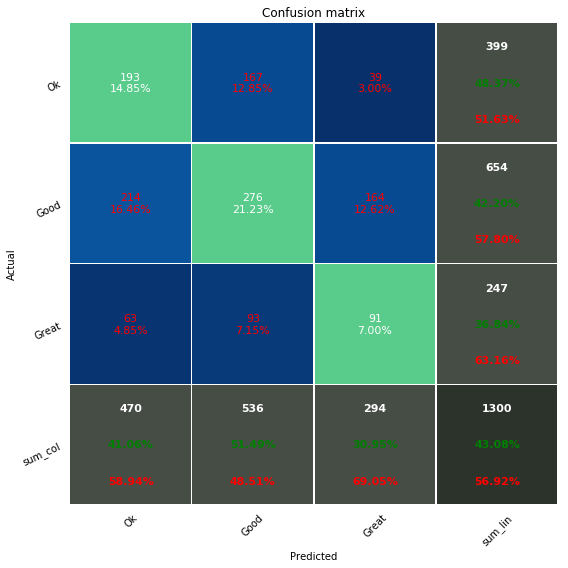

In [17]:
cmpp.pretty_plot_confusion_matrix(df_cm, cmap="Blues_r", show_null_values=1, pred_val_axis='x')

In [18]:
cm.sum(axis=1)

array([399, 654, 247])

In [19]:
np.diag(cm)

array([193, 276,  91])

In [20]:
cm.sum(axis=1) - np.diag(cm)

array([206, 378, 156])

## When Actual = Rows and Predicted = Columns
## TP: Diagonal top left to bottom right
## TN: Values in all columns and rows excluding given Class column and row
## FP: Values in column excluding TP
## FN: Values in row excluding TP

In [21]:
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (TP + FP + FN)

print(TP)
print(FP)
print(FN)
print(TN)

[193 276  91]
[277 260 203]
[206 378 156]
[624 386 850]


## Accuracy: How often correct?  _Diagonal / Total_

In [22]:
print(metrics.accuracy_score(y_test,y_pred))
print(TP.sum() / cm.sum())

0.4307692307692308
0.4307692307692308


## Classification Error: How often incorrect? _Non-Diagonal / Total_

In [23]:
print(1 - metrics.accuracy_score(y_test,y_pred))
print((cm.sum() - np.diag(cm).sum()) / cm.sum())

0.5692307692307692
0.5692307692307692


## Precision: When a positive value is predicted, how often is it correct? _TP / Column Total_

In [24]:
print(metrics.precision_score(y_test,y_pred, average=None))
print(TP / (TP + FP))

[0.4106383  0.51492537 0.30952381]
[0.4106383  0.51492537 0.30952381]


## Sensitivity (Recall or TPR): When actual value is positive, how often is prediction correct? _TP / Row Total_

In [25]:
print(metrics.recall_score(y_test,y_pred, average=None))
print(TP/(TP+FN))

[0.48370927 0.42201835 0.36842105]
[0.48370927 0.42201835 0.36842105]


## False Positive Rate FP / float(TN + FP)
=1 - Specificty

In [26]:
print(FP / (TN + FP))

[0.30743618 0.40247678 0.19278253]


## Specifity TN / float(TN + FP)
When the actual value is negative, how often is the prediction correct?

In [27]:
print(TN / (TN + FP))
print([1,1,1] - (FP / (TN + FP)))

[0.69256382 0.59752322 0.80721747]
[0.69256382 0.59752322 0.80721747]


In [28]:
metrics.matthews_corrcoef(y_test,y_pred)

0.10979898506574931

#### https://www.researchgate.net/post/Multiclass_Confusion_Matrix_Explanation

In [29]:
X_train.shape

(5197, 11)

In [30]:
X = pd.read_csv('../subset/X_wine.csv', index_col=0)
y = pd.read_csv('../subset/y_wine.csv', header=None, index_col=0, squeeze=True)

In [31]:
print(X.shape)
print(y.shape)

(6497, 11)
(6497,)


In [48]:
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [33]:
train_sizes = [50,520,1300,2600,3900,5196]
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [34]:
print(train_scores)
print(validation_scores)

[[1.         0.78       0.78       0.78       0.78      ]
 [0.76730769 0.74038462 0.74038462 0.74038462 0.74038462]
 [0.69384615 0.70230769 0.70461538 0.70461538 0.70461538]
 [0.69769231 0.705      0.68346154 0.67884615 0.67884615]
 [0.70179487 0.71051282 0.68589744 0.68923077 0.68717949]
 [0.70073133 0.70727483 0.6895689  0.68571978 0.69322556]]
[[0.36664105 0.35153846 0.36643572 0.37105466 0.36671803]
 [0.36510377 0.32846154 0.36489607 0.39414935 0.37365177]
 [0.36664105 0.27769231 0.36181678 0.39568899 0.37673344]
 [0.377402   0.37076923 0.42494226 0.43494996 0.43220339]
 [0.37893928 0.41153846 0.44726713 0.43648961 0.43682589]
 [0.38662567 0.39076923 0.43879908 0.45265589 0.43913713]]


In [35]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

In [36]:
print(pd.Series(train_scores_mean, index=train_sizes))
print()
print(pd.Series(validation_scores_mean, index=train_sizes))

50      0.824000
520     0.745769
1300    0.702000
2600    0.688769
3900    0.694923
5196    0.695304
dtype: float64

50      0.364478
520     0.365252
1300    0.355715
2600    0.408053
3900    0.422212
5196    0.421597
dtype: float64


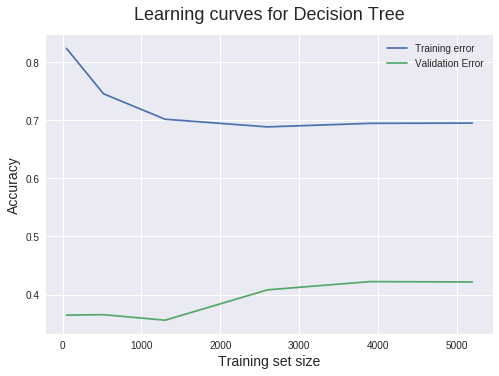

In [37]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [39]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [40]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

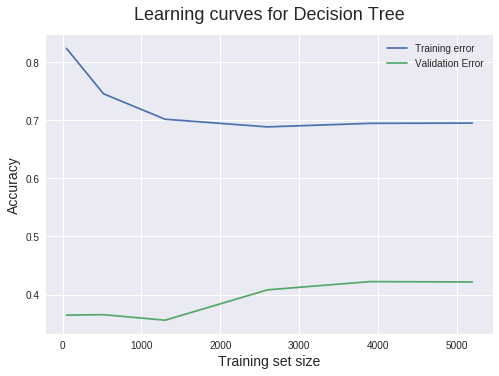

In [41]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [44]:
k_range = range(1,31)
weight_options = ['uniform','distance']

param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [45]:
grid = GridSearchCV(clf, param_grid, scoring='accuracy')

In [46]:
grid.fit(X,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [53]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005132,0.001870,0.011492,0.000807,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.405168,0.430748,0.427449,0.421117,0.011363,52,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003642,0.000068,0.010331,0.000696,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.405168,0.430748,0.427449,0.421117,0.011363,52,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.003396,0.000012,0.010959,0.000866,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.377942,0.428440,0.457948,0.421425,0.033036,51,0.838568,0.827292,0.822063,0.829308,0.006887
3,0.003391,0.000064,0.011186,0.000925,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.405168,0.430748,0.427449,0.421117,0.011363,52,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.003374,0.000055,0.011882,0.001081,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.399169,0.419206,0.396488,0.404956,0.010137,60,0.790531,0.786193,0.768059,0.781594,0.009733
5,0.003343,0.000116,0.011904,0.001198,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.403784,0.433518,0.409889,0.415730,0.012824,59,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.003355,0.000056,0.012371,0.001251,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.399631,0.435365,0.441312,0.425427,0.018410,44,0.725866,0.724775,0.708054,0.719565,0.008151
7,0.003345,0.000081,0.012746,0.001168,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.399169,0.428901,0.422366,0.416808,0.012760,58,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.003275,0.000028,0.013007,0.001238,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.424089,0.428901,0.427911,0.426966,0.002075,41,0.701386,0.696606,0.690053,0.696015,0.004645
9,0.003378,0.000065,0.013341,0.001427,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.404707,0.437673,0.416821,0.419732,0.013617,56,1.000000,1.000000,1.000000,1.000000,0.000000


In [49]:
grid.best_score_

0.43604740649530555

In [50]:
grid.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}